In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad
import scipy.optimize as opt

## 1

### a

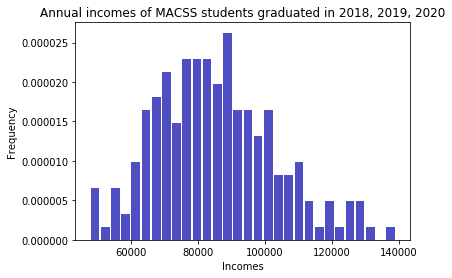

In [2]:
Incomes = np.loadtxt('data/incomes.txt')
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### b

For lognormal distribution, with calculation, we have:
$$EX = e^{\mu + \frac{\sigma^2}{2}}$$
$$Var = EX^2-(EX)^2 = e^{2\mu+\sigma^2}(e^{\sigma^2}-1)$$

mu_GMM1= 11.331880861821636  sig_GMM1= 0.20869665294140746
The value of my GMM criterion function at the estimated parameter values is 9.517151785442224e-16
Mean of points = 85276.82360625811 , Standard deviation of points = 17992.542128046523
Mean of model = 85276.82499059319 , Standard deviation of model = 17992.541656041052
Error vector= [ 1.62334268e-08 -2.62333954e-08]


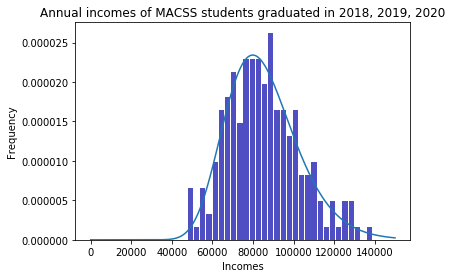

In [3]:
def lognorm(x, mu=11, sigma=0.5):
    return sts.lognorm.pdf(x,s = abs(sigma), scale = np.exp(mu))
def data_moments(data):
    mean_data = data.mean()
    std_data = data.std()
    return mean_data, std_data
def model_moments(mu, sigma):
    mean_model = np.exp(mu+(sigma**2)/2)
    std_model = np.sqrt(np.exp(2*mu+sigma**2)*(np.exp(sigma**2)-1))
    return mean_model, std_model
def err_vec(data, mu, sigma, simple):
    mean_data, std_data = data_moments(data)
    moms_data = np.array([[mean_data], [std_data]])
    mean_model, std_model = model_moments(mu, sigma)
    moms_model = np.array([[mean_model], [std_model]])
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec
def criterion(params, *args):
    mu, sigma = params
    data, W = args
    err = err_vec(data, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val[0,0]
mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(2)
gmm_args = (Incomes, W_hat)
results = opt.minimize(criterion, params_init, args=gmm_args, tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-2, None), (1e-2, None)))
mu_GMM1, sig_GMM1 = results.x
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)
crit_val1 = criterion(results.x,*gmm_args)
print('The value of my GMM criterion function at the estimated parameter values is', crit_val1)
mean_data, std_data = data_moments(Incomes)
mean_model, std_model = model_moments(mu_GMM1, sig_GMM1)
err1 = err_vec(Incomes, mu_GMM1, sig_GMM1, False).reshape(2,)
print('Mean of points =', mean_data, ', Standard deviation of points =', std_data)
print('Mean of model =', mean_model, ', Standard deviation of model =', std_model)
print('Error vector=', err1)
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X, mu_GMM1, sig_GMM1))
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### c

[[0.04451671 0.02724079]
 [0.02724079 0.40593057]]
[[23.42542666 -1.57201052]
 [-1.57201052  2.5689684 ]]
mu_GMM2= 11.331880840687973  sig_GMM2= 0.20869665707488436
The value of my GMM criterion function at the estimated parameter values is 7.060901570969943e-16
Mean of points = 85276.82360625811 , Standard deviation of points = 17992.542128046523
Mean of model2 = 85276.82326194478 , Standard deviation of model2 = 17992.541655493726
Error vector= [-4.03759565e-09 -2.62638150e-08]


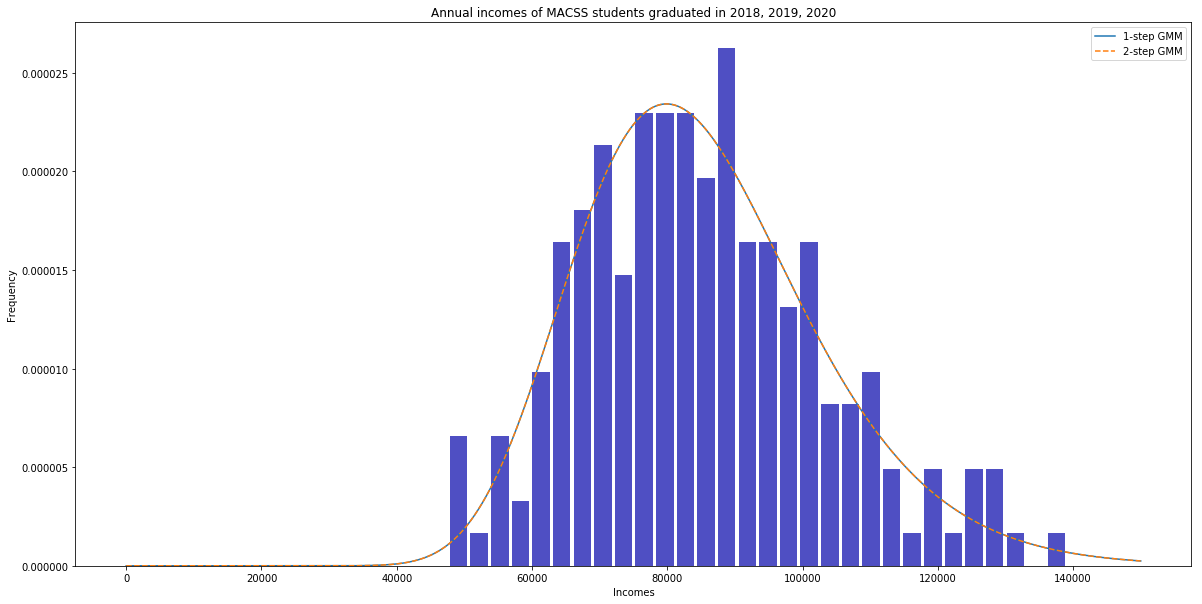

In [4]:
def get_Err_mat2(mu, sigma, data = Incomes, simple=False):
    R = 2
    N = len(data)
    Err_mat = np.zeros((R, N))
    mean_model, std_model = model_moments(mu, sigma)
    if simple:
        Err_mat[0, :] = data - mean_model
        Err_mat[1, :] = np.sqrt(((mean_data - data) ** 2)) - std_model
    else:
        Err_mat[0, :] = (data - mean_model) / mean_model
        Err_mat[1, :] = (np.sqrt(((mean_data - data) ** 2)) - std_model) / std_model
    
    return Err_mat
Err_mat = get_Err_mat2(mu_GMM1, sig_GMM1)
VCV2 = (1 / Incomes.shape[0]) * (Err_mat @ Err_mat.T)
print(VCV2)
W_hat2 = np.linalg.inv(VCV2)
print(W_hat2)
mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
new_gmm_args = (Incomes, W_hat2)
new_results = opt.minimize(criterion, params_init, args=new_gmm_args, tol=1e-14,
                       method='L-BFGS-B', bounds=((1e-2, None), (1e-2, None)))
mu_GMM2, sig_GMM2 = new_results.x
print('mu_GMM2=', mu_GMM2, ' sig_GMM2=', sig_GMM2)
crit_val2 = criterion(new_results.x,*gmm_args)
print('The value of my GMM criterion function at the estimated parameter values is', crit_val2)
mean_data, std_data = data_moments(Incomes)
mean_model2, std_model2 = model_moments(mu_GMM2, sig_GMM2)
err2 = err_vec(Incomes, mu_GMM2, sig_GMM2, False).reshape(2,)
print('Mean of points =', mean_data, ', Standard deviation of points =', std_data)
print('Mean of model2 =', mean_model2, ', Standard deviation of model2 =', std_model2)
print('Error vector=', err2)
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X, mu_GMM1, sig_GMM1), label = '1-step GMM')
ax.plot(X, lognorm(X, mu_GMM2, sig_GMM2), label = '2-step GMM', ls = '--')
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
ax.legend()
plt.show()

### d

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


mu_GMM1= 11.335681327424515  sig_GMM1= 0.21059845372108832
The value of my GMM criterion function at the estimated parameter values is 9.517151785442224e-16
Moment 1 of points = 0.3 ,Moment 2 of points = 0.49999999999999994 ,Moment 3 of points = 0.2
Moment 1 of model = 0.30000000363345053 ,Moment 2 of model = 0.5000000058534502 ,Moment 3 of model = 0.1999999905130997
Error vector= [[ 1.21115018e-08]
 [ 1.17069004e-08]
 [-4.74345016e-08]]


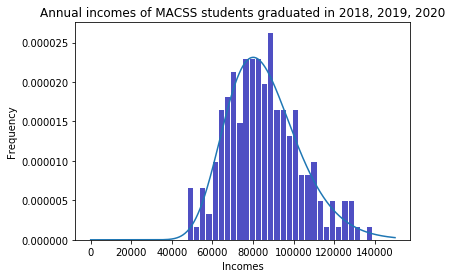

In [5]:
def lognorm(x, mu=11, sigma=0.5):
    return 1/(x*sigma * np.sqrt(2 * np.pi))*np.e**(-(np.log(x) - mu)**2 / (2 * sigma**2))
def new_data_moments(data):
    moment1 = np.mean((data<75000))
    moment3 = np.mean((data>100000))
    moment2 = 1-moment1-moment3
    return moment1, moment2, moment3
def new_model_moments(mu, sigma):
    moment1 = quad(lambda x: lognorm(x, mu, sigma), 0, 75000)[0]
    moment2 = quad(lambda x: lognorm(x, mu, sigma),75000,100000)[0]
    moment3 = quad(lambda x: lognorm(x, mu, sigma), 100000, np.inf)[0]
    return moment1, moment2, moment3
def new_err_vec(data, mu, sigma, simple):
    moment1_data, moment2_data, moment3_data = new_data_moments(data)
    moms_data = np.array([moment1_data, moment2_data, moment3_data]).reshape(3,1)
    moment1_model, moment2_model, moment3_model = new_model_moments(mu, sigma)
    moms_model = np.array([moment1_model, moment2_model, moment3_model]).reshape(3,1)
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec
def new_criterion(params, *args):
    mu, sigma = params
    data, W = args
    err = new_err_vec(data, mu, sigma, simple=False)
    crit_val = err.T @ W @ err
    return crit_val[0,0]
mu_init = 11
sig_init = 0.5
params_init = np.array([mu_init, sig_init])
W_hat = np.eye(3)
gmm_args2 = (Incomes, W_hat)
new_results = opt.minimize(new_criterion, params_init, args=gmm_args2, tol=1e-14,
                       method='L-BFGS-B',bounds=((1e-2, None), (1e-2, None)))
new_mu_GMM1 = new_results.x[0]
new_sig_GMM1 = new_results.x[1]
print('mu_GMM1=', new_mu_GMM1, ' sig_GMM1=', new_sig_GMM1)
new_crit_val1 = new_criterion(new_results.x,*gmm_args2)
print('The value of my GMM criterion function at the estimated parameter values is', crit_val1)
moment1_data, moment2_data, moment3_data = new_data_moments(Incomes)
moment1_model, moment2_model, moment3_model = new_model_moments(new_mu_GMM1, new_sig_GMM1)
new_err1 = new_err_vec(Incomes, new_mu_GMM1, new_sig_GMM1, False).reshape(3,1)
print('Moment 1 of points =', moment1_data, ',Moment 2 of points =', moment2_data, ',Moment 3 of points =', moment3_data, )
print('Moment 1 of model =', moment1_model, ',Moment 2 of model =', moment2_model, ',Moment 3 of model =', moment3_model, )
print('Error vector=', new_err1)
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X, new_mu_GMM1, new_sig_GMM1))
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
plt.show()

### e

[[ 2.33333328 -0.99999998 -1.00000004]
 [-0.99999998  0.99999998 -1.00000004]
 [-1.00000004 -1.00000004  4.00000038]]
[[2.04168229e+14 3.40280381e+14 1.36112144e+14]
 [3.40280381e+14 5.67133968e+14 2.26853574e+14]
 [1.36112144e+14 2.26853574e+14 9.07414241e+13]]
mu_GMM2= 11.335681329508411  sig_GMM2= 0.21059845560912005
The value of my GMM criterion function at the estimated parameter values is 1.48570893834706e-15
Moment 1 of points = 0.3 ,Moment 2 of points = 0.49999999999999994 ,Moment 3 of points = 0.2
Moment 1 of model = 0.3000000018275969 ,Moment 2 of model = 0.5000000027766799 ,Moment 3 of model = 0.19999999539572366
Error vector= [[ 6.09198969e-09]
 [ 5.55335988e-09]
 [-2.30213817e-08]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  


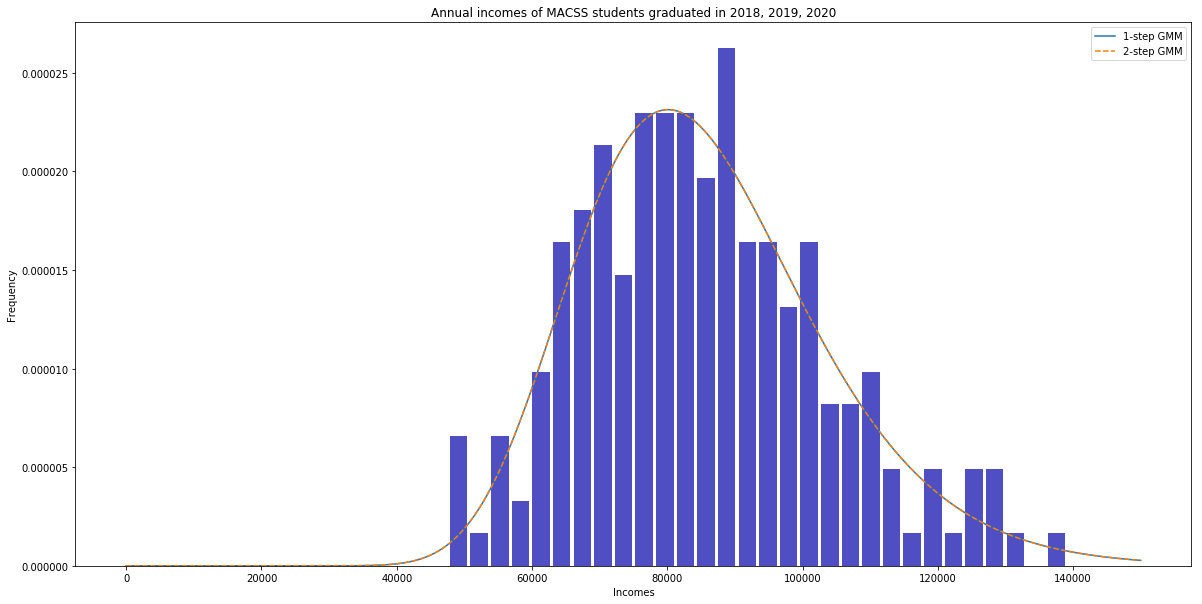

In [6]:
def new_get_Err_mat(mu, sigma, data = Incomes, simple=False):
    R = 3
    N = len(data)
    Err_mat = np.zeros((R, N))
    moment1,moment2,moment3 = new_model_moments(mu, sigma)
    if simple:
        Err_mat[0, :] = (data<75000) - moment1
        Err_mat[1, :] = (data<=100000)&(data>=75000) - moment2
        Err_mat[2, :] = (data>100000) - moment3
    else:
        Err_mat[0, :] = ((data<75000) - moment1)/moment1
        Err_mat[1, :] = (((data<=100000)&(data>=75000)) - moment2)/moment2
        Err_mat[2, :] = ((data>100000) - moment3)/moment3
    
    return Err_mat
new_Err_mat = new_get_Err_mat(new_mu_GMM1, new_sig_GMM1)
new_VCV2 = (1 / Incomes.shape[0]) * (new_Err_mat @ new_Err_mat.T)
print(new_VCV2)
new_W_hat2 = np.linalg.inv(new_VCV2)
print(new_W_hat2)
params_init = np.array([new_mu_GMM1, new_sig_GMM1])
new_gmm_args2 = (Incomes, new_W_hat2)
new_results2 = opt.minimize(new_criterion, params_init, args=new_gmm_args2, tol=1e-14,
                       method='L-BFGS-B',bounds=((1e-2, None), (1e-2, None)))
new_mu_GMM2, new_sig_GMM2 = new_results2.x
print('mu_GMM2=', new_mu_GMM2, ' sig_GMM2=', new_sig_GMM2)
new_crit_val2 = new_criterion(new_results2.x,*new_gmm_args2)
print('The value of my GMM criterion function at the estimated parameter values is', new_crit_val2)
moment1_data, moment2_data, moment3_data = new_data_moments(Incomes)
moment1_model, moment2_model, moment3_model = new_model_moments(new_mu_GMM2, new_sig_GMM2)
new_err2 = new_err_vec(Incomes, new_mu_GMM2, new_sig_GMM2, False).reshape(3,1)
print('Moment 1 of points =', moment1_data, ',Moment 2 of points =', moment2_data, ',Moment 3 of points =', moment3_data, )
print('Moment 1 of model =', moment1_model, ',Moment 2 of model =', moment2_model, ',Moment 3 of model =', moment3_model, )
print('Error vector=', new_err2)
X = np.linspace(0,150000, 150001)
fig,ax = plt.subplots(figsize=(20,10))
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('Annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(X, lognorm(X, new_mu_GMM1, new_sig_GMM1), label = '1-step GMM')
ax.plot(X, lognorm(X, new_mu_GMM2, new_sig_GMM2), label = '2-step GMM', ls = '--')
ax.hist(x=Incomes, bins=30, color='#0504aa', alpha=0.7, rwidth=0.85, normed = True)
ax.legend()
plt.show()

### f

The estimation in part(c) fits the data best. The reason is its value of GMM criterion is the largest. It's 2-step estimation using mean and standard deviation, so it should fit the data more than the estimation of part(b) because it's the 1st step of 2-step estimation. For (d) and (e), although estimation of (d) is almost as good as that of (b), using 2-step estimation doesn't improve the estimation a lot. Thus estimation in (c) is the best.

## 2

### a

In [7]:
def Data_moments(data):
    N = data.shape[0]
    data_moments = np.zeros((N,1))
    for i in range(N):
        data_moments[i,0] = data[i,0]
    return data_moments
def Model_moments(data, beta0, beta1, beta2, beta3):
    N = data.shape[0]
    model_moments = np.zeros((N,1))
    for i in range(N):
        model_moments[i,0] = beta0 + beta1*data[i,1]+beta2*data[i,2]+beta3*data[i,3]
    return model_moments
def Err_vec(data, beta0, beta1, beta2, beta3, simple):
    moms_data = Data_moments(data)
    moms_model = Model_moments(data, beta0, beta1, beta2, beta3)
    if simple:
        err_vec = moms_model - moms_data
    else:
        err_vec = (moms_model - moms_data) / moms_data
    return err_vec
def Criterion(params, *args):
    beta0, beta1, beta2, beta3 = params
    data, W = args
    err = Err_vec(data, beta0, beta1, beta2, beta3, simple=True)
    crit_val = err.T @ W @ err
    return crit_val[0,0]
Data = []
with open('data/sick.txt') as f:
    for line in f:
        line = line.strip()
        data = line.split(',')
        Data.append(data)
Data.pop(0)
for i in range(len(Data)):
    Data[i] = [float(x) for x in Data[i]]
Data = np.array(Data)
parameters_init = np.array([1,0,0,0])
W_Hat = np.eye(200)
Args = (Data, W_Hat)
Results = opt.minimize(Criterion, parameters_init, args=Args, tol=1e-14,
                       method='L-BFGS-B')
beta0_GMM, beta1_GMM, beta2_GMM, beta3_GMM = Results.x
Crit_val = Criterion(Results.x, *Args)
print('beta0_GMM =',beta0_GMM,
      'beta1_GMM =',beta1_GMM,
      'beta2_GMM =',beta2_GMM, 
      'beta3_GMM =',beta3_GMM)
print('The value of my GMM criterion function at the estimated parameter values is', Crit_val)

beta0_GMM = 0.2516448636612042 beta1_GMM = 0.012933470965564249 beta2_GMM = 0.40050098470289774 beta3_GMM = -0.009991709711286762
The value of my GMM criterion function at the estimated parameter values is 0.0018212898060782808
